In [2]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
pd.set_option("display.max_colwidth", None)
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [3]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d,1


In [4]:
df["target"].value_counts()

,count
target,
0,4342
1,3271


In [5]:
df_0 = df[df['target'] == 0]  # Non-disaster
df_1 = df[df['target'] == 1]  # Disaster

df_1_oversampled = df_1.sample(n=len(df_0), replace=True, random_state=42)


df_balanced = pd.concat([df_0, df_1_oversampled]).sample(frac=1, random_state=42).reset_index(drop=True)


print(df_balanced['target'].value_counts())


target
0    4342
1    4342
Name: count, dtype: int64


In [6]:
df["text"].head()

,text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,"13,000 people receive #wildfires evacuation orders in California"
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school


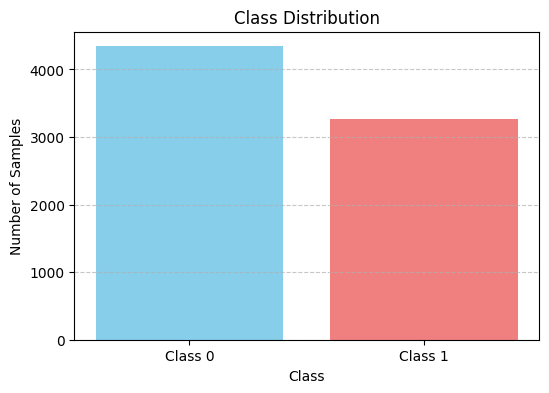

In [7]:
import matplotlib.pyplot as plt

classes = ['Class 0', 'Class 1']
counts = [4342, 3271]

plt.figure(figsize=(6, 4))
plt.bar(classes, counts, color=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from collections import Counter

all_words = ' '.join(df['clean_text']).split()

word_freq = Counter(all_words)
print(word_freq.most_common(30))


[('like', 345), ('im', 306), ('amp', 300), ('fire', 252), ('get', 229), ('new', 226), ('via', 220), ('dont', 208), ('news', 198), ('people', 196), ('one', 193), ('us', 170), ('video', 165), ('emergency', 157), ('disaster', 153), ('police', 141), ('would', 131), ('still', 129), ('time', 127), ('body', 125), ('burning', 120), ('crash', 119), ('back', 119), ('california', 117), ('storm', 117), ('suicide', 116), ('day', 113), ('got', 112), ('know', 112), ('man', 110)]


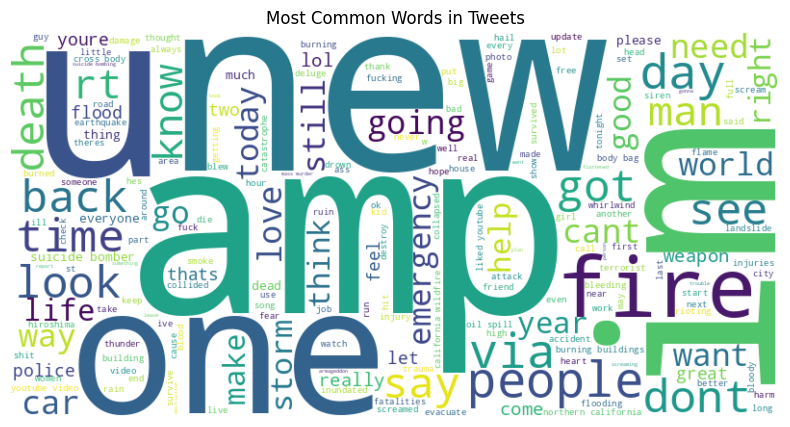

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


In [11]:
disaster_tweets = df[df['target'] == 1]['clean_text']
nondisaster_tweets = df[df['target'] == 0]['clean_text']

In [12]:
from wordcloud import WordCloud
disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_tweets))
nondisaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(nondisaster_tweets))

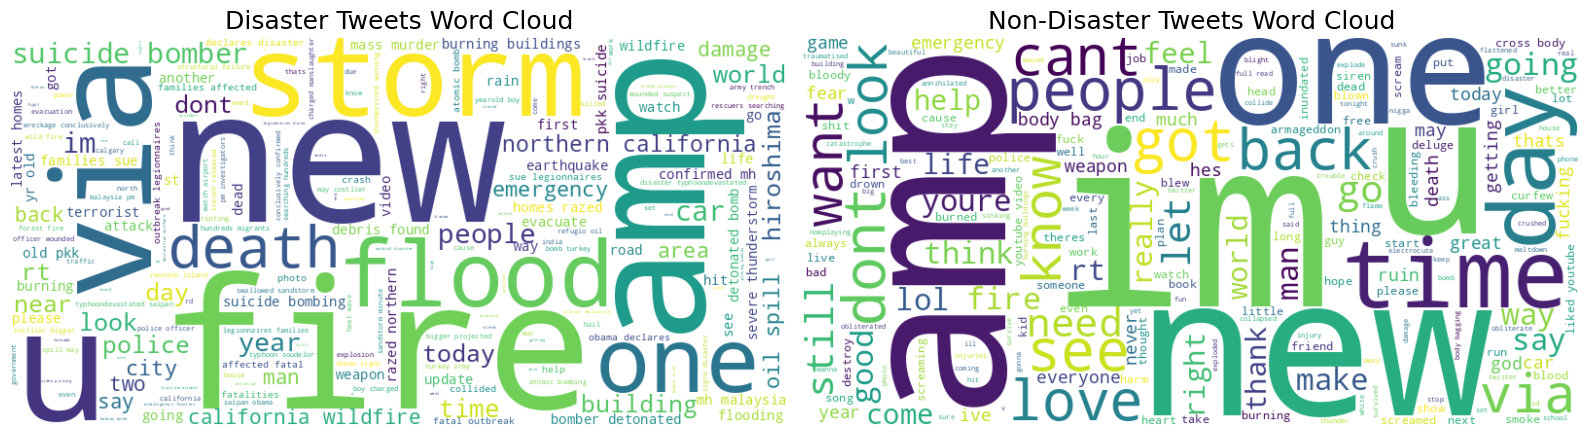

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.title('Disaster Tweets Word Cloud', fontsize=18)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nondisaster_wordcloud, interpolation='bilinear')
plt.title('Non-Disaster Tweets Word Cloud', fontsize=18)
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
disaster_words = ' '.join(disaster_tweets).split()
print(disaster_words[:20])


['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers']


Adding Meta Feature

In [15]:
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))


disaster_keywords = ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'flood', 'storm', 'hurricane', 'emergency', 'help', 'disaster', 'evacuate']


def keyword_flag(text):
    for keyword in disaster_keywords:
        if keyword in text.lower():
            return 1
    return 0

df['disaster_keyword_present'] = df['text'].apply(keyword_flag)


In [16]:
df.head()

,id,keyword,location,text,target,clean_text,char_count,word_count,disaster_keyword_present
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deeds reason earthquake may allah forgive us,69,13,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38,7,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,residents asked shelter place notified officers evacuation shelter place orders expected,133,22,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfires evacuation orders california,65,8,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfires pours school,88,16,1


In [17]:
X_text = df['text']
X_meta = df[['char_count', 'word_count', 'disaster_keyword_present']]
y = df['target']

In [18]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_val, X_meta_train, X_meta_val, y_train, y_val = train_test_split(
    X_text, X_meta, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_text_train)
X_val_tfidf = tfidf.transform(X_text_val)


In [20]:
from scipy.sparse import hstack

X_train_combined = hstack([X_train_tfidf, X_meta_train])
X_val_combined = hstack([X_val_tfidf, X_meta_val])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model_tf = LogisticRegression(max_iter=1000)
model_tf.fit(X_train_combined, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = model_tf.predict(X_val_combined)

print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.81      0.71      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

Accuracy: 0.8076165462902167


Lets Apply GridSearchCV and improved hyperparameters

In [23]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

In [24]:
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 3, 5],
    'tfidf__stop_words': [None, 'english'],
    'clf__C': [0.1, 1, 10],
}

In [25]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipeline, param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid.fit(X_text_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'tfidf__max_features': [3000, 5000, 7000],
                         'tfidf__min_df': [1, 3, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             verbose=2)

In [26]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
best_model = grid.best_estimator_

X_val_pred = best_model.predict(X_text_val)
print(classification_report(y_val, X_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, X_val_pred))


Best Parameters: {'clf__C': 1, 'tfidf__max_features': 7000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None}
Best CV Score: 0.7950738916256158
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Validation Accuracy: 0.8003939592908733


Surprisingly, there is some drop in Accuracy and F1-score in GridSearchCV.

Lets try  Combine Text + Meta-Features into GridSearchCV

In [27]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

In [28]:
class TextSelector(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X['text']

class MetaSelector(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[['char_count', 'word_count', 'disaster_keyword_present']]


Pipeline

In [29]:
features = FeatureUnion([
    ('text_pipeline', Pipeline([
        ('selector', TextSelector()),
        ('tfidf', TfidfVectorizer())
    ])),
    ('meta_pipeline', Pipeline([
        ('selector', MetaSelector()),
        ('scaler', StandardScaler())
    ]))
])


pipeline = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(max_iter=1000))
])


Hyperparameters of GridSearchCV

In [30]:
param_grid = {
    'features__text_pipeline__tfidf__max_features': [3000, 5000, 7000],
    'features__text_pipeline__tfidf__ngram_range': [(1,1), (1,2)],
    'features__text_pipeline__tfidf__min_df': [1, 3, 5],
    'features__text_pipeline__tfidf__stop_words': [None, 'english'],
    'clf__C': [0.1, 1, 10],
}


In [31]:
grid = GridSearchCV(pipeline, param_grid,
                    cv=3, verbose=2, n_jobs=-1)

X_train_combined = pd.concat([X_text_train, X_meta_train], axis=1)
X_val_combined = pd.concat([X_text_val, X_meta_val], axis=1)

grid.fit(X_train_combined, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('text_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         TextSelector()),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer())])),
                                                                       ('meta_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         MetaSelector()),
                                                                                        ('scaler',
                                                                                         StandardScaler())]))])),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'features__text_pipeline__tfidf__max_features': [3000,
                                                                          5000,
                                                                          7000],
                         'features__text_pipeline__tfidf__min_df': [1, 3, 5],
                         'features__text_pipeline__tfidf__ngram_range': [(1, 1),
                                                                         (1,
                                                                          2)],
                         'features__text_pipeline__tfidf__stop_words': [None,
                                                                        'english']},
             verbose=2)

In [32]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_model = grid.best_estimator_

y_val_pred = best_model.predict(X_val_combined)

print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Best Parameters: {'clf__C': 1, 'features__text_pipeline__tfidf__max_features': 5000, 'features__text_pipeline__tfidf__min_df': 1, 'features__text_pipeline__tfidf__ngram_range': (1, 1), 'features__text_pipeline__tfidf__stop_words': None}
Best CV Score: 0.7888341543513957
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.81      0.71      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523

Validation Accuracy: 0.8063033486539725


Lets USe Word Embedding

In [35]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-04-24 03:13:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-24 03:13:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-24 03:13:30--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [37]:
import numpy as np
def load_glove_embeddings(path):
    embedding_index = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
    return embedding_index


glove_path = 'glove.6B.100d.txt'
embedding_index = load_glove_embeddings(glove_path)

def text_to_glove_vector(text, embedding_index, vector_dim=100):
    words = text.split()
    word_vectors = [embedding_index[word] for word in words if word in embedding_index]
    if len(word_vectors) == 0:
        return np.zeros(vector_dim)
    else:
        return np.mean(word_vectors, axis=0)


X_glove = np.array([text_to_glove_vector(t, embedding_index) for t in df['text']])

In [38]:
X_meta = df[['char_count', 'word_count', 'disaster_keyword_present']].values


In [39]:
X_final = np.hstack([X_glove, X_meta])
y_final = df['target'].values


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))


Accuracy: 0.7458962573867367
F1 Score: 0.6766917293233082
Precision: 0.7390510948905109
Recall: 0.6240369799691834


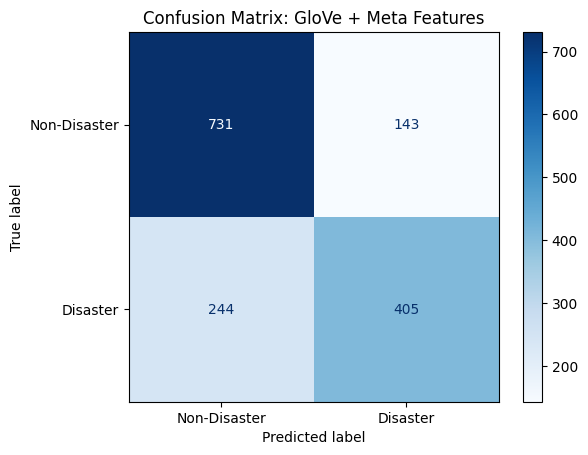

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Disaster", "Disaster"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: GloVe + Meta Features')
plt.show()


In [44]:
pip install transformers


In [45]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [46]:
def get_bert_embeddings(texts, tokenizer, model, max_length=64):
    embeddings = []
    model.eval()

    with torch.no_grad():
        for text in texts:
            encoded = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
            output = model(**encoded)
            cls_embedding = output.last_hidden_state[:, 0, :]
            embeddings.append(cls_embedding.squeeze(0).numpy())

    return np.array(embeddings)

X_bert = get_bert_embeddings(df['text'].tolist(), tokenizer, bert_model)


In [47]:
X_meta = df[['char_count', 'word_count', 'disaster_keyword_present']].values
X_final_bert = np.hstack([X_bert, X_meta])
y_final_bert = df['target'].values


In [63]:
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_final_bert, y_final_bert, test_size=0.2, random_state=42)


In [64]:
model_bert = LogisticRegression(max_iter=1000)
model_bert.fit(X_train_bert, y_train_bert)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [50]:
y_pred_bert = model_bert.predict(X_val_bert)

print("Accuracy:", accuracy_score(y_val_bert, y_pred_bert))
print("F1 Score:", f1_score(y_val_bert, y_pred_bert))
print("Precision:", precision_score(y_val_bert, y_pred_bert))
print("Recall:", recall_score(y_val_bert, y_pred_bert))


Accuracy: 0.8017071569271176
F1 Score: 0.759170653907496
Precision: 0.7867768595041322
Recall: 0.7334360554699538


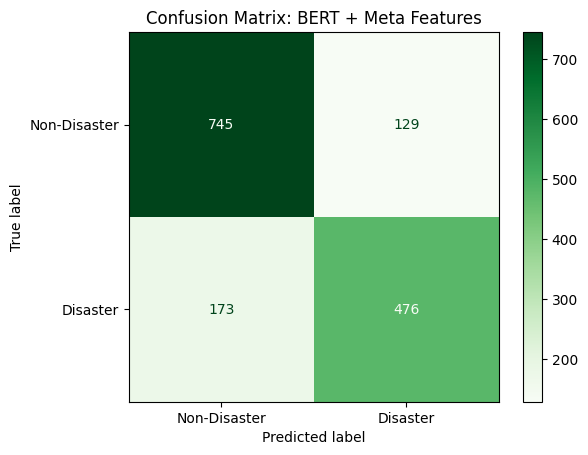

In [51]:
cm_bert = confusion_matrix(y_val_bert, y_pred_bert)
disp_bert = ConfusionMatrixDisplay(confusion_matrix=cm_bert, display_labels=["Non-Disaster", "Disaster"])
disp_bert.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix: BERT + Meta Features')
plt.show()


lets lode test data and will check both TF and BERT model to evaluate the performance

In [52]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [53]:
test_df['char_count'] = test_df['text'].apply(len)
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))
disaster_keywords = ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'flood', 'storm', 'hurricane', 'emergency', 'help', 'disaster', 'evacuate']
test_df['disaster_keyword_present'] = test_df['text'].apply(
    lambda x: 1 if any(word in x.lower() for word in disaster_keywords) else 0
)


In [54]:
X_test_meta = test_df[['char_count', 'word_count', 'disaster_keyword_present']]
X_test_tfidf = tfidf.transform(test_df['text'])

from scipy.sparse import hstack
X_test_combined = hstack([X_test_tfidf, X_test_meta])

y_test_pred_tfidf = model_tf.predict(X_test_combined)

In [58]:
test_df['predicted_target'] = y_test_pred_tfidf

print(test_df[['text', 'predicted_target']])


                                                                                                                                             text  \
0                                                                                                              Just happened a terrible car crash   
1                                                                                Heard about #earthquake is different cities, stay safe everyone.   
2                                                there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
3                                                                                                        Apocalypse lighting. #Spokane #wildfires   
4                                                                                                   Typhoon Soudelor kills 28 in China and Taiwan   
...                                                                                                       

In [61]:
pd.set_option('display.max_colwidth', 100)
output_df = test_df[['text', 'predicted_target']].copy()
output_df['predicted_label'] = output_df['predicted_target'].map({0: 'Non-Disaster', 1: 'Disaster'})
print(output_df.head(10))


                                                                                               text  \
0                                                                Just happened a terrible car crash   
1                                  Heard about #earthquake is different cities, stay safe everyone.   
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
3                                                          Apocalypse lighting. #Spokane #wildfires   
4                                                     Typhoon Soudelor kills 28 in China and Taiwan   
5                                                                We're shaking...It's an earthquake   
6                          They'd probably still show more life than Arsenal did yesterday, eh? EH?   
7                                                                                 Hey! How are you?   
8                                                                        

In [60]:
output_df.to_csv('structured_disaster_predictions.csv', index=False)
print("Saved structured predictions to 'structured_disaster_predictions.csv'")


📁 Saved structured predictions to 'structured_disaster_predictions.csv'


In [62]:
test_df[['id', 'predicted_target']].to_csv('tfidf_test_predictions.csv', index=False)
print("Predictions saved to 'tfidf_test_predictions.csv'")


Predictions saved to 'tfidf_test_predictions.csv'


Lets check Bert Model Prediction

In [65]:
test_texts = test_df['text'].tolist()
X_test_bert = get_bert_embeddings(test_texts, tokenizer, bert_model)

In [67]:
test_df['char_count'] = test_df['text'].apply(len)
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))
disaster_keywords = ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la',
                     'ronge', 'sask', 'canada', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers',
                     'flood', 'storm', 'hurricane', 'emergency', 'help', 'disaster', 'evacuate']

test_df['disaster_keyword_present'] = test_df['text'].apply(
    lambda x: 1 if any(word in x.lower() for word in disaster_keywords) else 0)

In [66]:
X_test_meta = test_df[['char_count', 'word_count', 'disaster_keyword_present']].values
X_test_combined_bert = np.hstack((X_test_bert, X_test_meta))

y_test_pred_bert = model_bert.predict(X_test_combined_bert)

In [68]:
test_df['bert_predicted_target'] = y_test_pred_bert
test_df['bert_predicted_label'] = test_df['bert_predicted_target'].map({0: 'Non-Disaster', 1: 'Disaster'})

In [69]:
print(test_df[['text', 'predicted_target']])

                                                                                                     text  \
0                                                                      Just happened a terrible car crash   
1                                        Heard about #earthquake is different cities, stay safe everyone.   
2        there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
3                                                                Apocalypse lighting. #Spokane #wildfires   
4                                                           Typhoon Soudelor kills 28 in China and Taiwan   
...                                                                                                   ...   
3258                                              EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn   
3259  Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it wa...   
3260               

In [70]:
test_df['tf_predicted_label'] = test_df['predicted_target'].map({0: 'Non-Disaster', 1: 'Disaster'})
test_df['bert_predicted_label'] = test_df['bert_predicted_target'].map({0: 'Non-Disaster', 1: 'Disaster'})


comparison_df = test_df[['text', 'predicted_target', 'tf_predicted_label',
                         'bert_predicted_target', 'bert_predicted_label']]

comparison_df.columns = ['Text', 'TF-IDF Predicted (0/1)', 'TF-IDF Label',
                         'BERT Predicted (0/1)', 'BERT Label']


print(comparison_df.head(10))


                                                                                               Text  \
0                                                                Just happened a terrible car crash   
1                                  Heard about #earthquake is different cities, stay safe everyone.   
2  there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all   
3                                                          Apocalypse lighting. #Spokane #wildfires   
4                                                     Typhoon Soudelor kills 28 in China and Taiwan   
5                                                                We're shaking...It's an earthquake   
6                          They'd probably still show more life than Arsenal did yesterday, eh? EH?   
7                                                                                 Hey! How are you?   
8                                                                        